**IMPORTING LIBRARIES**

In [1]:
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [3]:
dataset = (r"C:\Users\fastf\Downloads\fruit dataset")

**VISUALIZING THE DATASET**

In [4]:
dataset = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\fastf\Downloads\fruit dataset",
    image_size=(224, 224),
    batch_size=32)




Found 16264 files belonging to 4 classes.


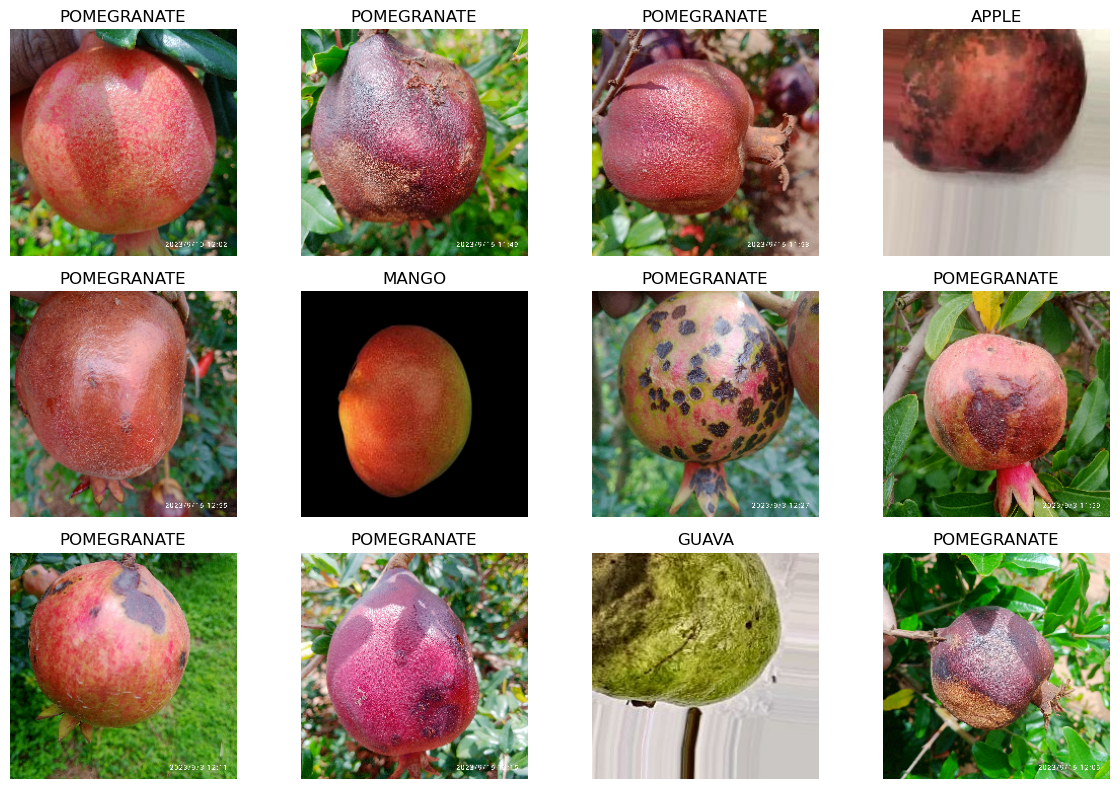

In [5]:
class_names = dataset.class_names

plt.figure(figsize=(12, 8))
for images, labels in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.tight_layout()
plt.show()


In [6]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image

In [7]:
root_dir = "C:/Users/fastf/Downloads/fruit dataset"


fruit_groups = defaultdict(list)

for fruit_folder in os.listdir(root_dir):
    fruit_path = os.path.join(root_dir, fruit_folder)
    if os.path.isdir(fruit_path):
        for class_folder in os.listdir(fruit_path):
            if "_" in class_folder:
                fruit_name = fruit_folder.capitalize()
                fruit_groups[fruit_name].append(os.path.join(fruit_path, class_folder))

In [8]:
import matplotlib.pyplot as plt
import math
import numpy as np

def visualize_all_fruits_with_diseases(dataset, class_names, images_per_fruit=4):
    fruit_to_images = {}

    
    for image_batch, label_batch in dataset:
        for img, label in zip(image_batch, label_batch):
            label_name = class_names[label.numpy()]
            parts = label_name.split()
            fruit = parts[-1] 
            disease = " ".join(parts[:-1])  

            if fruit not in fruit_to_images:
                fruit_to_images[fruit] = []

            if len(fruit_to_images[fruit]) < images_per_fruit:
                fruit_to_images[fruit].append((img.numpy().astype("uint8"), disease))

        
        if all(len(images) >= images_per_fruit for images in fruit_to_images.values()):
            break

    
    for fruit, images in fruit_to_images.items():
        num_images = len(images)
        cols = 4
        rows = math.ceil(num_images / cols)

        plt.figure(figsize=(cols * 3.5, rows * 3.5))
        for i in range(num_images):
            ax = plt.subplot(rows, cols, i + 1)
            plt.imshow(images[i][0])
            plt.title(f"{fruit}\n{images[i][1]}", fontsize=9)  
            plt.axis("off")

        plt.suptitle(f"{fruit} - Disease Samples", fontsize=14)
        plt.tight_layout()
        plt.show()


    

       

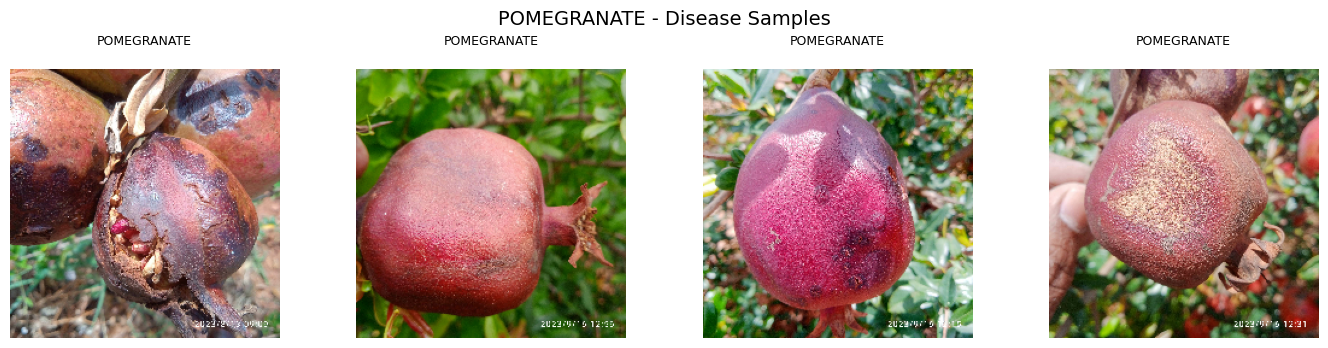

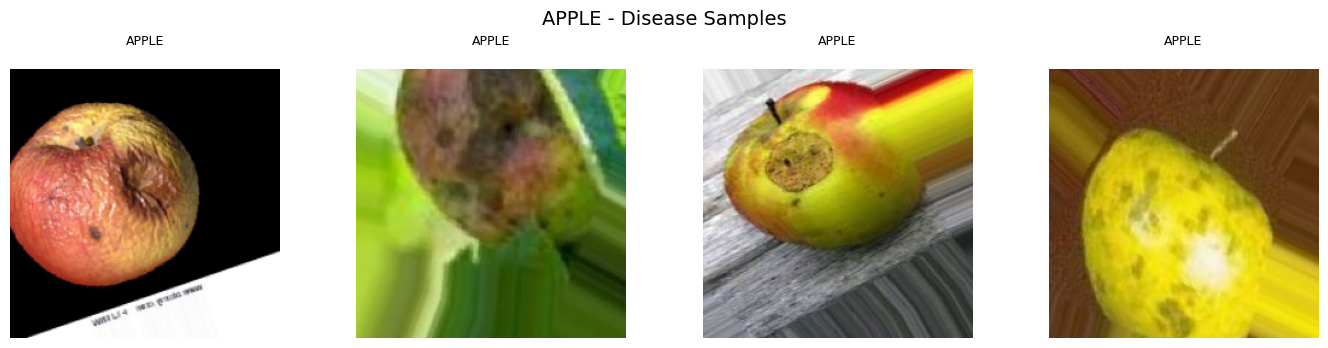

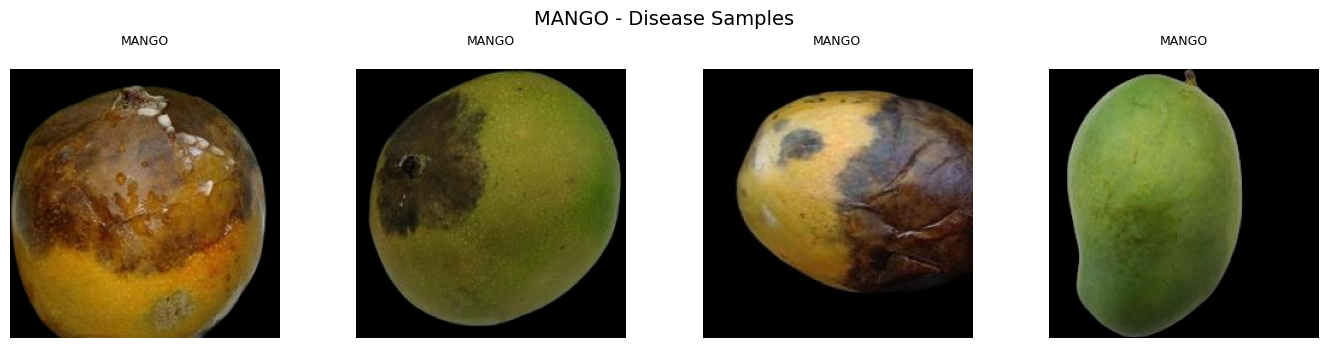

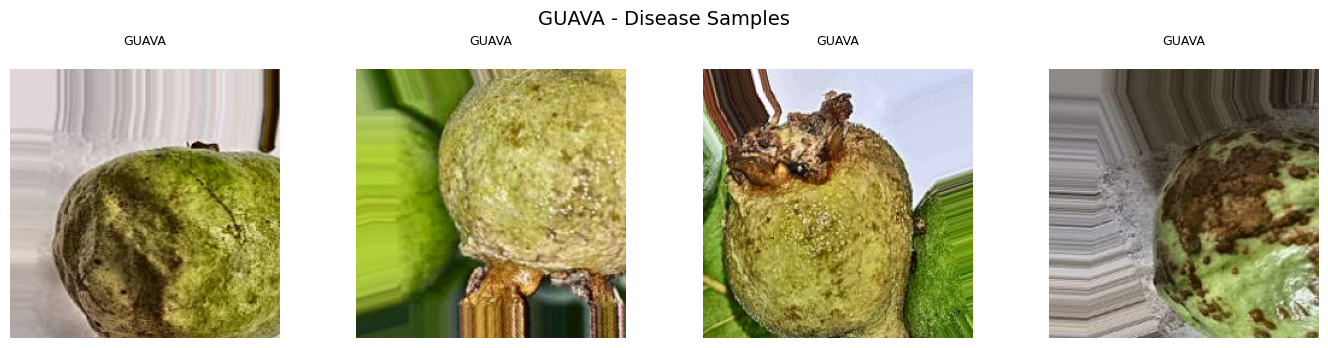

In [9]:
visualize_all_fruits_with_diseases(dataset, class_names, images_per_fruit=4)



**VISUALIZE THE CLASS COUNT AND CHECK THE IMBALANCE**

In [10]:

root_dir = r"C:\Users\fastf\Downloads\fruit dataset"
disease_counts = defaultdict(int)
for fruit in os.listdir(root_dir):
    fruit_path = os.path.join(root_dir, fruit)
    if os.path.isdir(fruit_path):
        for disease in os.listdir(fruit_path):
            disease_path = os.path.join(fruit_path, disease)
            if os.path.isdir(disease_path):
                count = len([
                    f for f in os.listdir(disease_path)
                    if f.lower().endswith(('.jpg', '.jpeg', '.png'))
                ])
                disease_name = f"{disease}_{fruit}"
                disease_counts[disease_name] = count


for disease, count in disease_counts.items():
    print(f"{disease}: {count}")


Blotch_Apple_APPLE: 500
Healthy_Apple_APPLE: 500
Rot_Apple_APPLE: 500
Scab_Apple_APPLE: 500
Anthracnose_Guava_GUAVA: 500
Fruitfly_Guava_GUAVA: 500
Healthy_Guava_GUAVA: 500
Alternaria_Mango_MANGO: 500
Anthracnose_Mango_MANGO: 500
Black Mould Rot (Aspergillus)_Mango_MANGO: 500
Healthy_Mango_MANGO: 205
Stem and Rot (Lasiodiplodia)_MANGO: 499
Alternaria_POMEGRANATE: 886
Anthracnose_POMEGRANATE: 1166
Bacterial_Blight_POMEGRANATE: 966
Cercospora_POMEGRANATE: 631
Healthy_POMEGRANATE: 1450


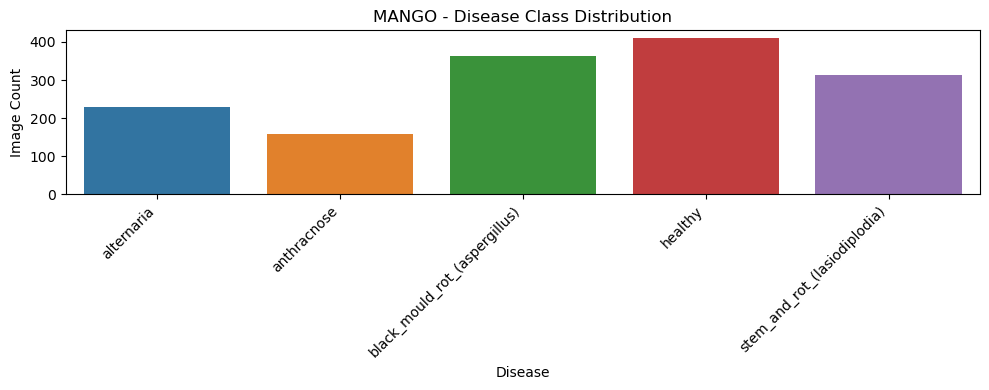

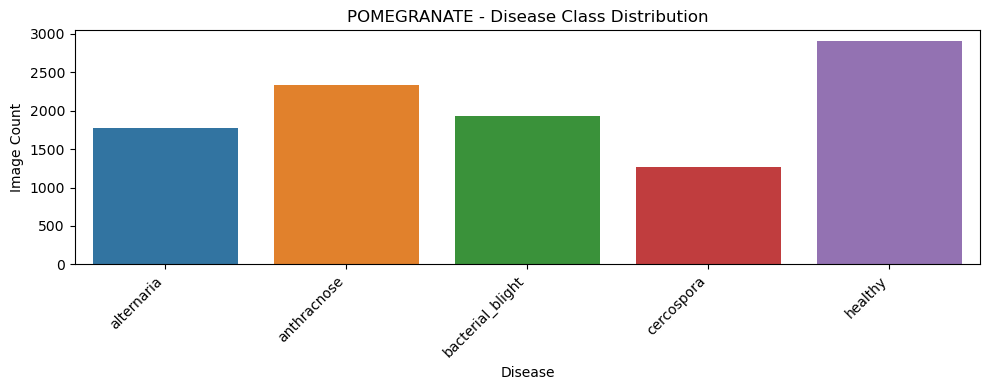

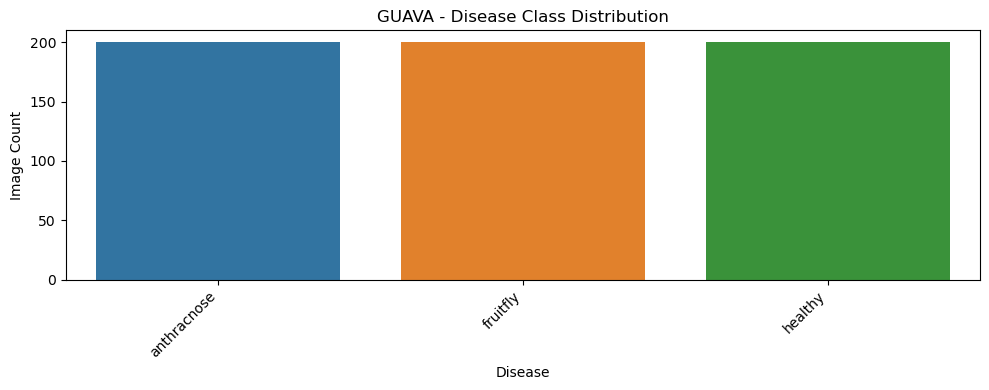

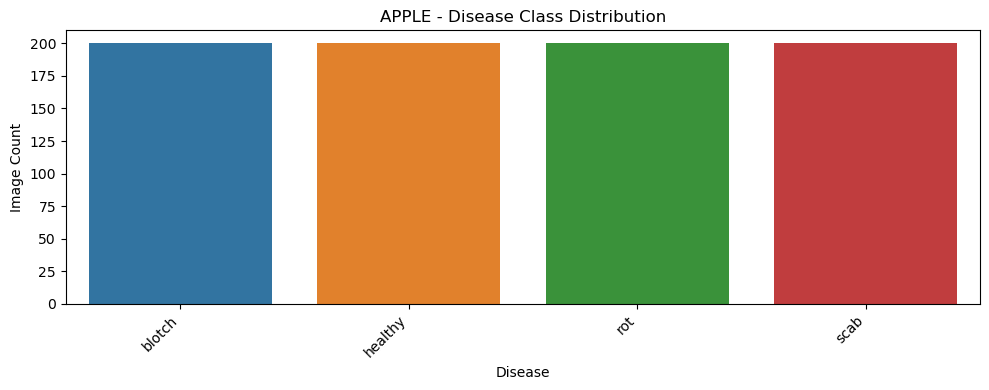

In [11]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
dataset_dir = r"C:\Users\fastf\Downloads\fruit_dataset_flattened"
fruit_disease_counts = defaultdict(lambda: defaultdict(int))
for class_folder in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_folder)
    if os.path.isdir(class_path):
        count = len(os.listdir(class_path))

        
        parts = class_folder.lower().split('_')
        if len(parts) >= 3 and parts[-1] == parts[-2]:  
            disease = '_'.join(parts[:-2])
            fruit = parts[-1].upper()
        else:
            disease = '_'.join(parts[:-1])
            fruit = parts[-1].upper()

        fruit_disease_counts[fruit][disease] += count


for fruit, disease_dict in fruit_disease_counts.items():
    plt.figure(figsize=(10, 4))
    sns.barplot(x=list(disease_dict.keys()), y=list(disease_dict.values()), hue=list(disease_dict.keys()), legend=False, palette='tab10')

    plt.title(f"{fruit} - Disease Class Distribution")
    plt.xlabel("Disease")
    plt.ylabel("Image Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    
    


**DATA AGUMENTATION**

In [12]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = r"C:\Users\fastf\Downloads\fruit dataset"
target = 500


classes = [
    'APPLE/Blotch_Apple', 'APPLE/Healthy_Apple', 'APPLE/Rot_Apple', 'APPLE/Scab_Apple',
    'GUAVA/Anthracnose_Guava', 'GUAVA/Fruitfly_Guava', 'GUAVA/Healthy_Guava',
    'MANGO/Alternaria_Mango', 'MANGO/Anthracnose_Mango',
    'MANGO/Black Mould Rot (Aspergillus)_Mango', 'MANGO/Stem and Rot (Lasiodiplodia)',
]


datagen = ImageDataGenerator(
    rotation_range=30, zoom_range=0.2,
    width_shift_range=0.2, height_shift_range=0.2,
    horizontal_flip=True, fill_mode='nearest'
)


for cls in classes:
    path = os.path.join(root, cls)
    if not os.path.exists(path):
        print(f"[SKIPPED] Folder not found: {path}")
        continue

    imgs = [f for f in os.listdir(path) if f.endswith(('.jpg', '.png'))]

    while len(os.listdir(path)) < target:
        for img_name in imgs:
            if len(os.listdir(path)) >= target:
                break
            img_path = os.path.join(path, img_name)
            img = load_img(img_path, target_size=(224, 224))
            x = np.expand_dims(img_to_array(img), 0)
            aug = datagen.flow(x, batch_size=1)
            save_img(os.path.join(path, f"aug_{np.random.randint(99999)}.jpg"), next(aug)[0])

    print(f"{cls} augmented to {target} images")


APPLE/Blotch_Apple augmented to 500 images
APPLE/Healthy_Apple augmented to 500 images
APPLE/Rot_Apple augmented to 500 images
APPLE/Scab_Apple augmented to 500 images
GUAVA/Anthracnose_Guava augmented to 500 images
GUAVA/Fruitfly_Guava augmented to 500 images
GUAVA/Healthy_Guava augmented to 500 images
MANGO/Alternaria_Mango augmented to 500 images
MANGO/Anthracnose_Mango augmented to 500 images
MANGO/Black Mould Rot (Aspergillus)_Mango augmented to 500 images
MANGO/Stem and Rot (Lasiodiplodia) augmented to 500 images


In [13]:
import os
import shutil

source_dir = r"C:\Users\fastf\Downloads\fruit dataset"
target_dir = r"C:\Users\fastf\Downloads\flat_dataset"

os.makedirs(target_dir, exist_ok=True)

image_extensions = ('.jpg', '.jpeg', '.png')

for fruit in os.listdir(source_dir):
    fruit_path = os.path.join(source_dir, fruit)
    if os.path.isdir(fruit_path):
        for disease in os.listdir(fruit_path):
            disease_path = os.path.join(fruit_path, disease)
            target_class_path = os.path.join(target_dir, disease)
            os.makedirs(target_class_path, exist_ok=True)

            for img_file in os.listdir(disease_path):
                src = os.path.join(disease_path, img_file)
                
                
                if not img_file.lower().endswith(image_extensions):
                    continue
                if not os.path.isfile(src):
                    continue

                dst = os.path.join(target_class_path, img_file)
                shutil.copy2(src, dst)

print("Flattened dataset ready!")


Flattened dataset ready!


In [14]:
import tensorflow as tf

dataset_path = r"C:\Users\fastf\Downloads\flat_dataset"
img_size = (224, 224)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 10803 files belonging to 17 classes.
Using 8643 files for training.
Found 10803 files belonging to 17 classes.
Using 2160 files for validation.
Classes: ['Alternaria', 'Alternaria_Mango', 'Anthracnose', 'Anthracnose_Guava', 'Anthracnose_Mango', 'Bacterial_Blight', 'Black Mould Rot (Aspergillus)_Mango', 'Blotch_Apple', 'Cercospora', 'Fruitfly_Guava', 'Healthy', 'Healthy_Apple', 'Healthy_Guava', 'Healthy_Mango', 'Rot_Apple', 'Scab_Apple', 'Stem and Rot (Lasiodiplodia)']


**BUILD THE MODEL**

In [15]:

import tensorflow as tf
from tensorflow.keras.optimizers import Adam


base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')
for layer in base_model.layers[:100]:
    layer.trainable = False


model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])


In [16]:
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
fine_tune_epochs = 10
history_finetune = model.fit(train_ds,
                             validation_data=val_ds,
                             epochs=fine_tune_epochs)

Epoch 1/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 297s 1s/step - accuracy: 0.7648 - loss: 0.6974 - val_accuracy: 0.7116 - val_loss: 0.8762
Epoch 2/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 296s 1s/step - accuracy: 0.7955 - loss: 0.6171 - val_accuracy: 0.7505 - val_loss: 0.7408
Epoch 3/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 297s 1s/step - accuracy: 0.8103 - loss: 0.5563 - val_accuracy: 0.7870 - val_loss: 0.6356
Epoch 4/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 299s 1s/step - accuracy: 0.8288 - loss: 0.5024 - val_accuracy: 0.8139 - val_loss: 0.5408
Epoch 5/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 299s 1s/step - accuracy: 0.8443 - loss: 0.4664 - val_accuracy: 0.8310 - val_loss: 0.4841
Epoch 6/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.8604 - loss: 0.4110 - val_accuracy: 0.8407 - val_loss: 0.4585
Epoch 7/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 229s 843ms/step - accuracy: 0.8753 - loss: 0.3740 - val_accuracy: 0.8444 - val_loss: 0.4363
Epoch 8/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 241s 888ms/step - accuracy: 0.8789 - loss: 0.3601 - va

**EVALUATE THE MODEL**

In [19]:
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Validation Loss: {val_loss:.2f}")


68/68 ━━━━━━━━━━━━━━━━━━━━ 31s 445ms/step - accuracy: 0.8690 - loss: 0.3819
Validation Accuracy: 0.86
Validation Loss: 0.39


In [20]:
model.save("fruit_disease_model.h5")


In [41]:
import os

flat_dataset_dir = r"C:\Users\fastf\Downloads\flat_dataset"


rename_map = {
    "Alternaria": "Alternaria_Pomegranate",
    "Anthracnose": "Anthracnose_Pomegranate",
    "Bacterial_Blight": "Bacterial_Blight_Pomegranate",
    "Cercospora": "Cercospora_Pomegranate",
    "Healthy": "Healthy_Pomegranate",
    "Stem and Rot (Lasiodiplodia)": "Stem and Rot (Lasiodiplodia)_Mango"
}

for old_name, new_name in rename_map.items():
    old_path = os.path.join(flat_dataset_dir, old_name)
    new_path = os.path.join(flat_dataset_dir, new_name)
    
    if os.path.exists(old_path):
        print(f"Renaming {old_name} → {new_name}")
        os.rename(old_path, new_path)
    else:
        print(f"Folder not found: {old_path}")


Renaming Alternaria → Alternaria_Pomegranate
Renaming Anthracnose → Anthracnose_Pomegranate
Renaming Bacterial_Blight → Bacterial_Blight_Pomegranate
Renaming Cercospora → Cercospora_Pomegranate
Renaming Healthy → Healthy_Pomegranate
Renaming Stem and Rot (Lasiodiplodia) → Stem and Rot (Lasiodiplodia)_Mango


In [42]:
dataset = tf.keras.utils.image_dataset_from_directory(
    flat_dataset_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    shuffle=True
)

class_names = dataset.class_names
print(class_names)


Found 10803 files belonging to 17 classes.
['Alternaria_Mango', 'Alternaria_Pomegranate', 'Anthracnose_Guava', 'Anthracnose_Mango', 'Anthracnose_Pomegranate', 'Bacterial_Blight_Pomegranate', 'Black Mould Rot (Aspergillus)_Mango', 'Blotch_Apple', 'Cercospora_Pomegranate', 'Fruitfly_Guava', 'Healthy_Apple', 'Healthy_Guava', 'Healthy_Mango', 'Healthy_Pomegranate', 'Rot_Apple', 'Scab_Apple', 'Stem and Rot (Lasiodiplodia)_Mango']


**PREDICT ON NEW IMAGE**

In [44]:

disease_diagnosis = {
    "Blotch": "Blotch is a fungal disease causing dark spots on fruit skin, leading to rotting.",
    "Healthy": "This fruit is healthy with no visible signs of disease.",
    "Rot": "Rot is caused by fungal or bacterial infection, leading to tissue breakdown.",
    "Scab": "Scab causes lesions and rough patches on fruit surfaces due to fungal attack.",
    "Anthracnose": "Anthracnose causes dark sunken spots, mainly due to Colletotrichum fungus.",
    "Fruitfly": "Fruit flies lay eggs inside the fruit, causing it to decay from the inside.",
    "Alternaria": "Alternaria is a fungal disease causing dark spots and can reduce crop yield.",
    "Black Mould Rot (Aspergillus)": "This is caused by Aspergillus fungus, leading to black mold and fruit decay.",
    "Stem and Rot (Lasiodiplodia)": "Caused by Lasiodiplodia, it affects stems and leads to rapid rotting.",
}


In [47]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_disease(img_path):
    
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    
    preds = model.predict(img_array)
    predicted_index = np.argmax(preds[0])
    predicted_label = class_names[predicted_index]  
   
    if "_" in predicted_label:
        disease, fruit = predicted_label.rsplit("_", 1)
    else:
        disease = predicted_label
        fruit = "Unknown"

   

    
    diagnosis = disease_diagnosis.get(disease, "Diagnosis not available.")

    print(f"Fruit: {fruit}")
    print(f"Disease: {disease}")
    print(f"Diagnosis: {diagnosis}")
    
    


In [48]:
predict_disease(r"C:\Users\fastf\Downloads\fruit dataset\MANGO\Alternaria_Mango\aug_36822.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Fruit: Mango
Disease: Stem and Rot (Lasiodiplodia)
Diagnosis: Caused by Lasiodiplodia, it affects stems and leads to rapid rotting.


In [55]:
predict_disease(r"C:\Users\fastf\Downloads\fruit dataset\GUAVA\Anthracnose_Guava\aug_87732.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Fruit: Guava
Disease: Fruitfly
Diagnosis: Fruit flies lay eggs inside the fruit, causing it to decay from the inside.
